#**Python入門（その2）：Pythonで単回帰と相関**

このColabのノートブック「Python入門（その2）」では「statsmodels.formula.apiを使って単回帰（回帰分析）をする方法」を解説します（相関係数は後半に説明します）。
すでに「[Python入門（その1）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_python入門_1_basic.ipynb)」を読んでいることを前提に説明します。

> 注：このノートブックは駒澤大学経済学部で開講している「経済統計a/b」で「Excel以外の手法を学ぶ意欲がある履修生向け」に**最低限の知識**だけ解説する**補助資料**です

> このノートブックでは「statsmodels.formula.apiを使う」方法を解説します（Rに慣れている人はこちらの「~」を使う表記の方が馴染みがあるはず）。以下の公式サイトを参考にしました。
<br>
https://www.statsmodels.org/
<br>
https://www.statsmodels.org/devel/example_formulas.html

In [ ]:
# 最初に重要な呪文を唱えます。
# 初心者の間は何をしているのかわからなくても構いません。
import pandas as pd
import statsmodels.formula.api as smf
# 注釈：statsmodelsのメソッドを使う場合は、以下のように
# statsmodels.apiのimportが必要となります。
# import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


データ分析（回帰分析）を使うため、データ（CSVファイル）をインターネットから読み込みます。ここではread_csvというメソッドを使ってインターネット上にあるデータをPythonに読み込み、ice_dataという名前で保存します。head()というメソッドはデータを上から5行表示するメソッドです。

In [ ]:
ice_data = pd.read_csv("https://www.dropbox.com/s/2ky13qi387j8b05/kion_iceCream.csv?raw=1",encoding="utf_8")
ice_data.head()


,年月,気温,アイスクリーム支出金額
0,2005年4月,15.1,541
1,2005年5月,17.7,666
2,2005年6月,23.2,801
3,2005年7月,25.6,1033
4,2005年8月,28.1,1175


ice_dataはデータフレームという形式で保存されています。<br>
<br>
回帰分析（最小二乗法）にはメソッドols()とfit()を使います。使い方は以下の図を見てください（回帰式を指定するとき1重引用符を使って囲むのがポイントです）。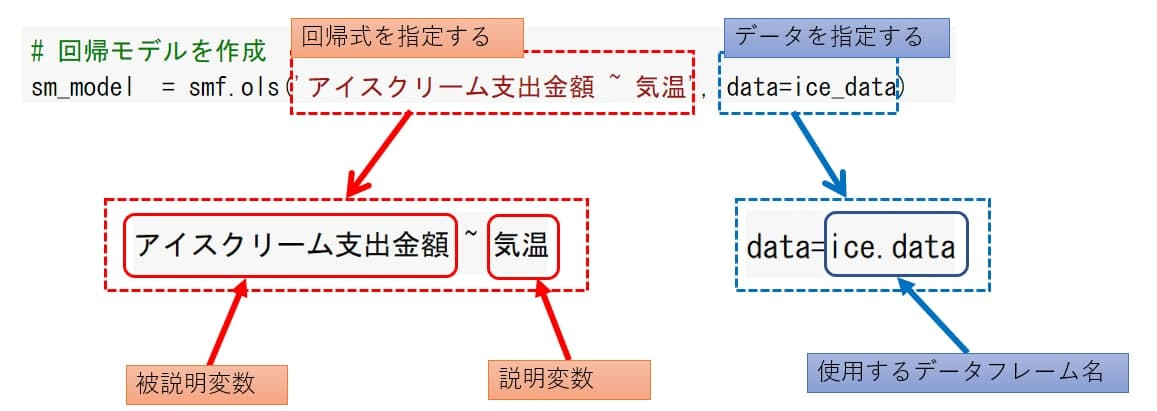

In [ ]:
# 回帰モデルを作成
sm_model  = smf.ols('アイスクリーム支出金額 ~ 気温', data=ice_data)
# 最小二乗法で回帰モデルを推定
result = sm_model.fit()

print(result.params)

Intercept    16.639928
気温           35.074078
dtype: float64


メソッドsummary()を使うと回帰結果をまとめて表示してくれます。

In [ ]:
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:            アイスクリーム支出金額   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.06e-22
Time:                        12:34:12   Log-Likelihood:                -374.43
No. Observations:                  60   AIC:                             752.9
Df Residuals:                      58   BIC:                             757.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6399     40.652      0.409      0.6

**Pythonで相関係数を計算する**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [ ]:
ice_tmp = ice_data[["気温", "アイスクリーム支出金額"]]
ice_tmp.corr()

,気温,アイスクリーム支出金額
気温,1.000000,0.898597
アイスクリーム支出金額,0.898597,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text

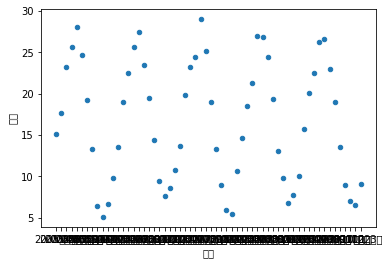

In [ ]:
ice_data.plot.scatter(x="年月", y="気温")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text

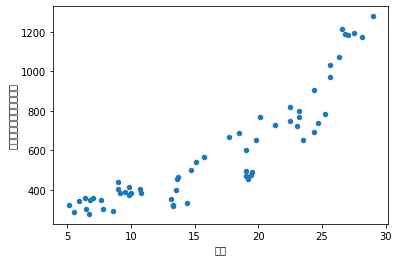

In [ ]:
ice_data.plot.scatter(x="気温",	y="アイスクリーム支出金額")